In [8]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data_folder: Path = Path("../data/benchmark_output")
benchmark_speed_file: Path = data_folder / "benchmark_results.csv"
benchmark_compression_file: Path = data_folder / "bits_per_int_2.csv"
sns.set(rc={'figure.figsize':(20,14)})
plt.tight_layout()

<Figure size 1440x1008 with 0 Axes>

## Preprocessing

In [10]:
def to_int(text: str) -> int:
    only_number: str = ''.join(c for c in text if c.isdigit())
    if only_number == "":
        return 0
    return int(only_number)

def complete_with_seq(library: str, process_type: str) -> str:
    if "seq" in process_type:
        return library + "_seq"
    return library

def load_benchmark_results(path: Path) -> DataFrame:
    benchmark_speeds: DataFrame = pd.read_csv(path, skiprows=9, skipfooter=1)
    benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
    benchmark_speeds["name"] = [lib.replace("SIMDCompressionAndIntersection", "SIMDCAI").replace("with_select", "with_direct") for lib in benchmark_speeds["name"]]

    benchmark_speeds["input_data"] = [name.split("get_with_")[1] for name in benchmark_speeds["name"]]
    benchmark_speeds["library"] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds["name"]]
    benchmark_speeds["process_type"] = [name.split("_benchmark_")[1].split("_get")[0] for name in benchmark_speeds["name"]]
    benchmark_speeds["lib"] = [name.split("_")[0] for name in benchmark_speeds["library"]]
    benchmark_speeds["sorted"] = ["sorted" in input_data for input_data in benchmark_speeds["input_data"]]
    benchmark_speeds["pos_size"] = [to_int(input_data) for input_data in benchmark_speeds["input_data"]]
    benchmark_speeds["library"] = [complete_with_seq(library, process_type)
                                   for library, process_type in
                                   zip(benchmark_speeds["library"], benchmark_speeds["process_type"])]
    return benchmark_speeds

benchmark_speeds: DataFrame = load_benchmark_results(benchmark_speed_file)
benchmark_speeds

<ipython-input-10-b2f273fd2f0a>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  benchmark_speeds: DataFrame = pd.read_csv(path, skiprows=9, skipfooter=1)


,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,input_data,library,process_type,lib,sorted,pos_size
0,BenchmarkColumnCompressionFixture/unencoded_be...,87223,13685.1,7710.34,ns,NaN,NaN,NaN,NaN,NaN,small_numbers,unencoded,encoding,unencoded,False,0
1,BenchmarkColumnCompressionFixture/unencoded_be...,122634,16155.9,9718.34,ns,NaN,NaN,NaN,NaN,NaN,small_numbers,unencoded,decoding,unencoded,False,0
2,BenchmarkColumnCompressionFixture/unencoded_be...,73956,12720.0,7827.61,ns,NaN,NaN,NaN,NaN,NaN,sequential_sorted_numbers,unencoded,encoding,unencoded,True,0
3,BenchmarkColumnCompressionFixture/unencoded_be...,103376,15580.2,10712.20,ns,NaN,NaN,NaN,NaN,NaN,sequential_sorted_numbers,unencoded,decoding,unencoded,True,0
4,BenchmarkColumnCompressionFixture/unencoded_be...,65109,12557.2,9124.78,ns,NaN,NaN,NaN,NaN,NaN,huge_numbers,unencoded,encoding,unencoded,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,67982,10281.9,10281.40,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_10_sorted,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,True,10
751,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,67686,10386.5,10386.50,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_100_sorted,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,True,100
752,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,64328,10861.5,10861.40,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_1000_sorted,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,True,1000
753,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,42723,16509.5,16509.60,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_10000_sorted,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,True,10000


## Encoding

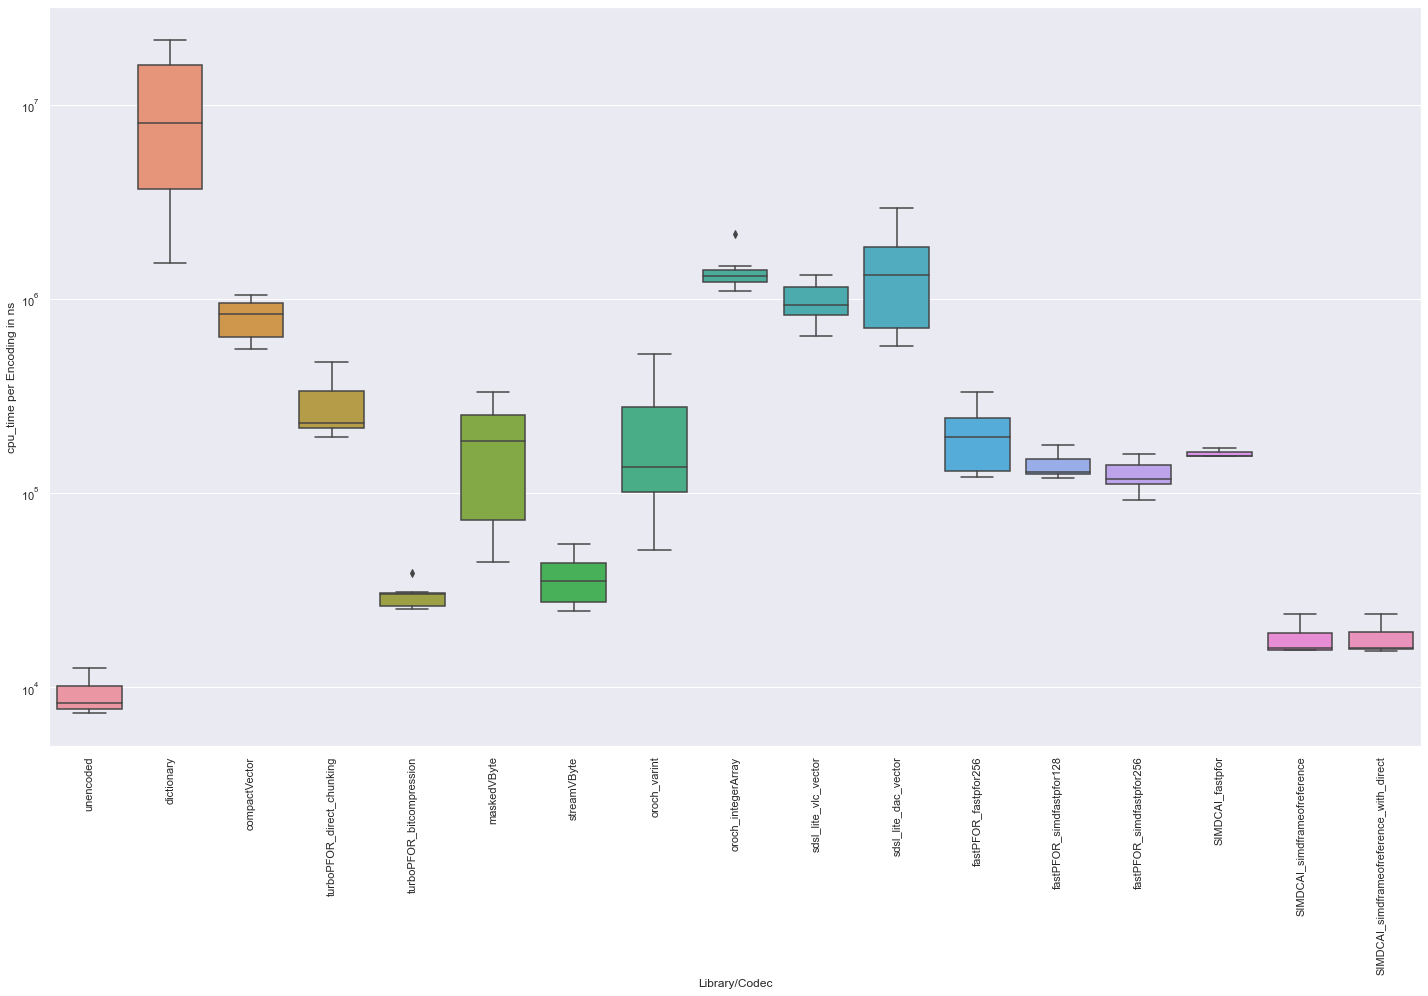

In [11]:
encoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "encoding"]
plot: sns.boxplot = sns.boxplot(data=encoding, x="library", y="cpu_time")

plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.tight_layout()
plot.set(
    xlabel='Library/Codec', 
    ylabel='cpu_time per Encoding in ns'
)
plt.savefig("visualizations/libraries_encoding.svg", format="svg")

## Decoding

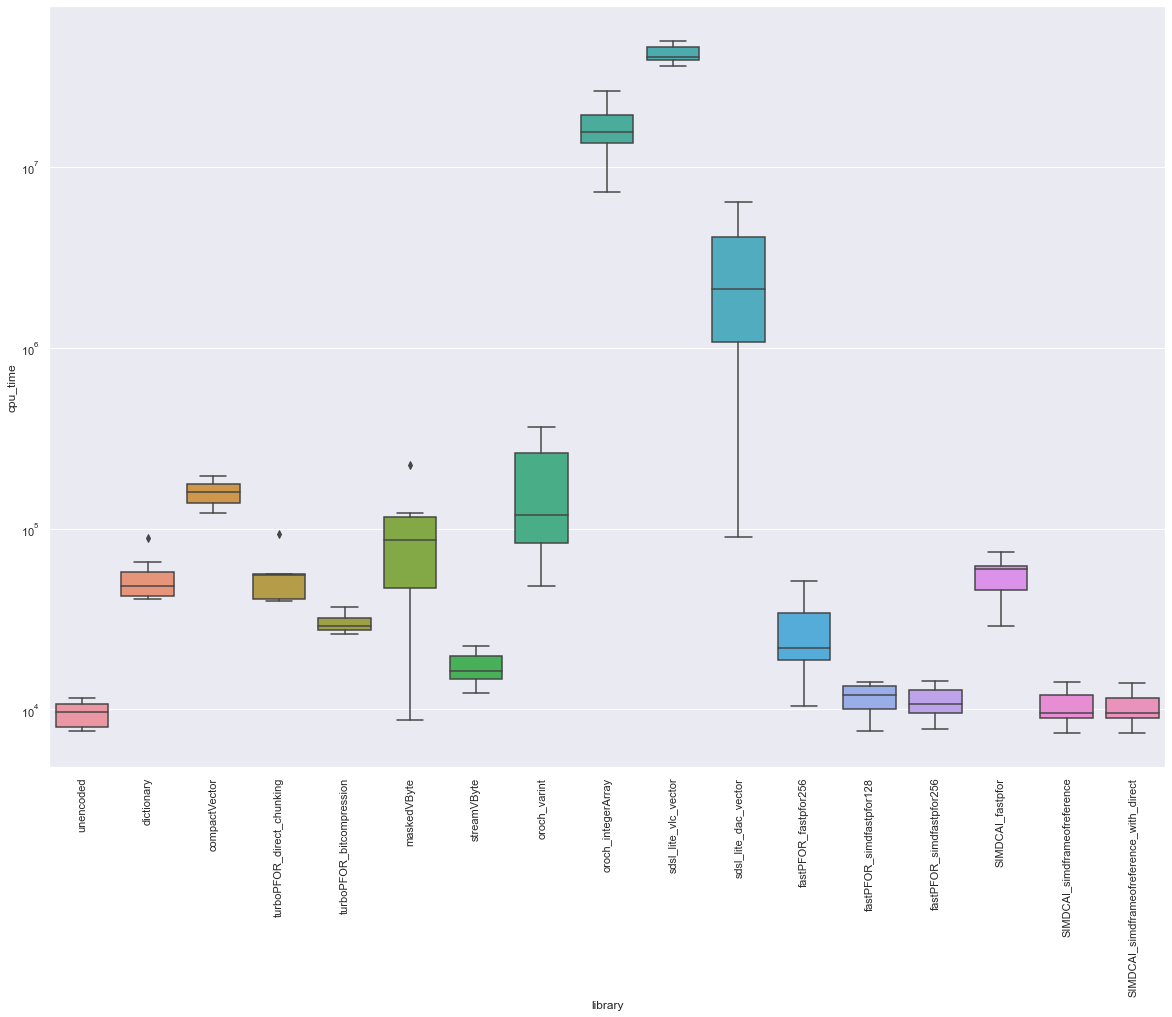

In [12]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
plot: sns.boxplot = sns.boxplot(data=decoding, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("log")
plt.savefig("visualizations/libraries_decoding.svg", format="svg")

## Point decoding libs

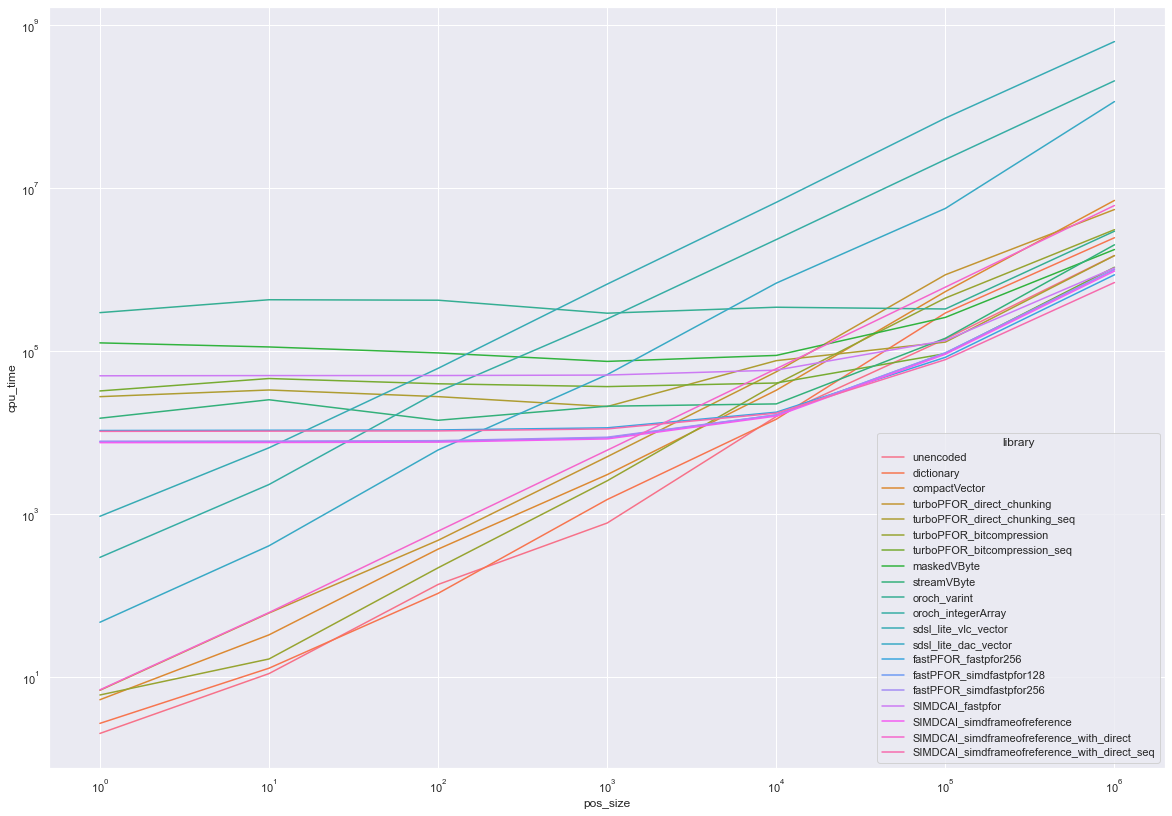

In [13]:
only_unsorted: DataFrame = benchmark_speeds[benchmark_speeds["sorted"] == False]
only_copy: DataFrame = only_unsorted[~only_unsorted["process_type"].str.contains("nocopy")]
only_with_poslist: DataFrame = only_copy[only_copy["pos_size"] > 0 ]
lineplot: sns.lineplot = sns.lineplot(data=only_with_poslist, x="pos_size", y="cpu_time", hue="library")
lineplot.set_xscale("log")
lineplot.set_yscale("log")
plt.savefig("visualizations/libraries_point_based.svg")

## Decoding Point Based (only random access libs, detailed view for accessing 10000 out of 65000 points)

av_numbers_get_poslist_10


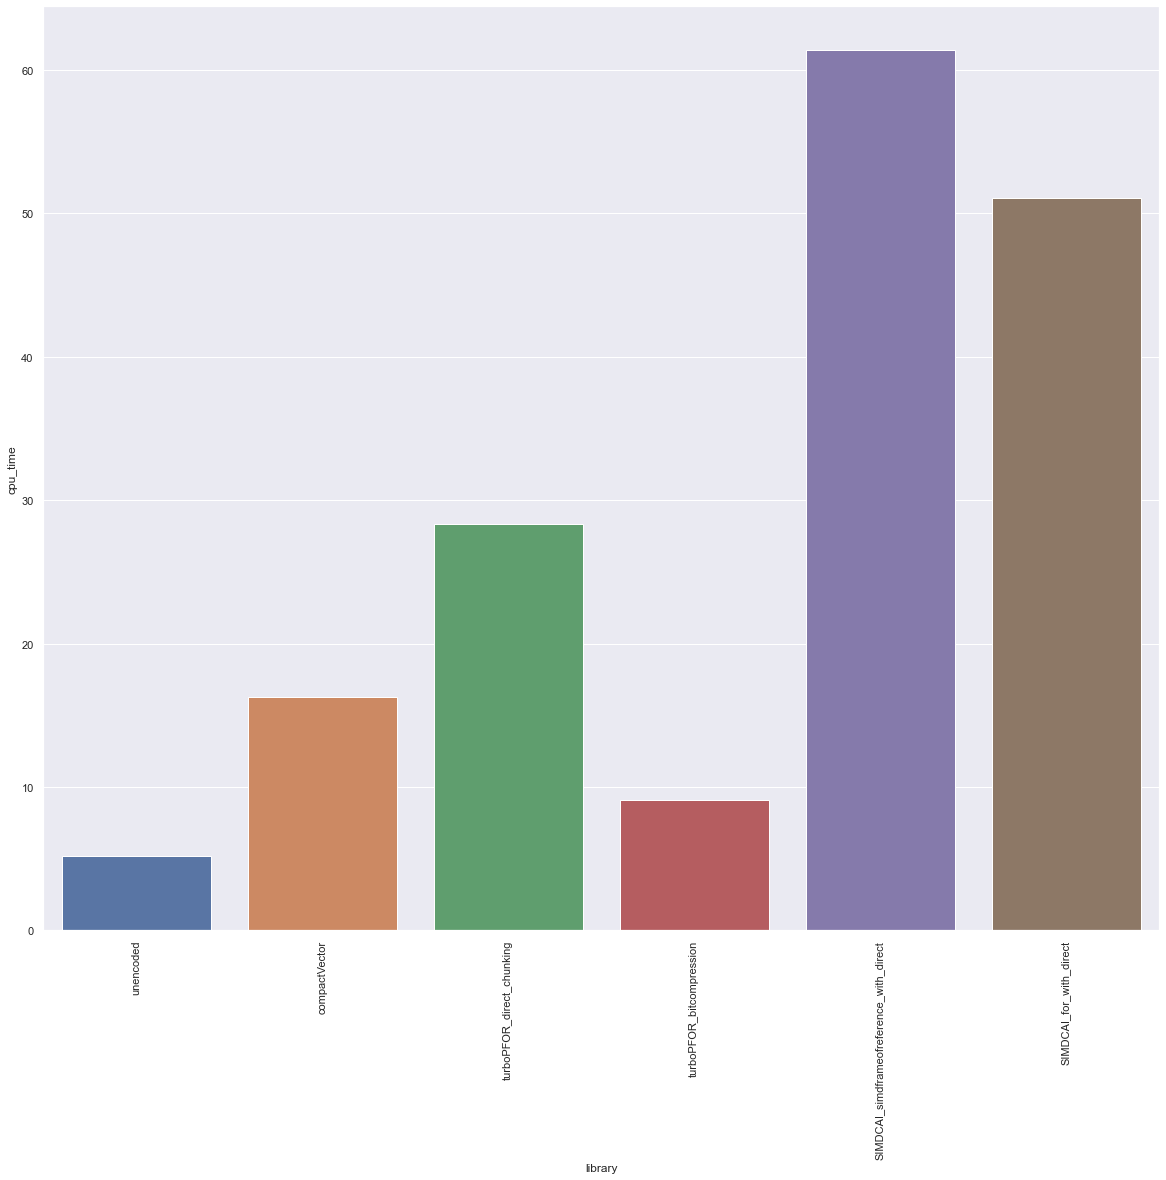

av_numbers_get_poslist_10000


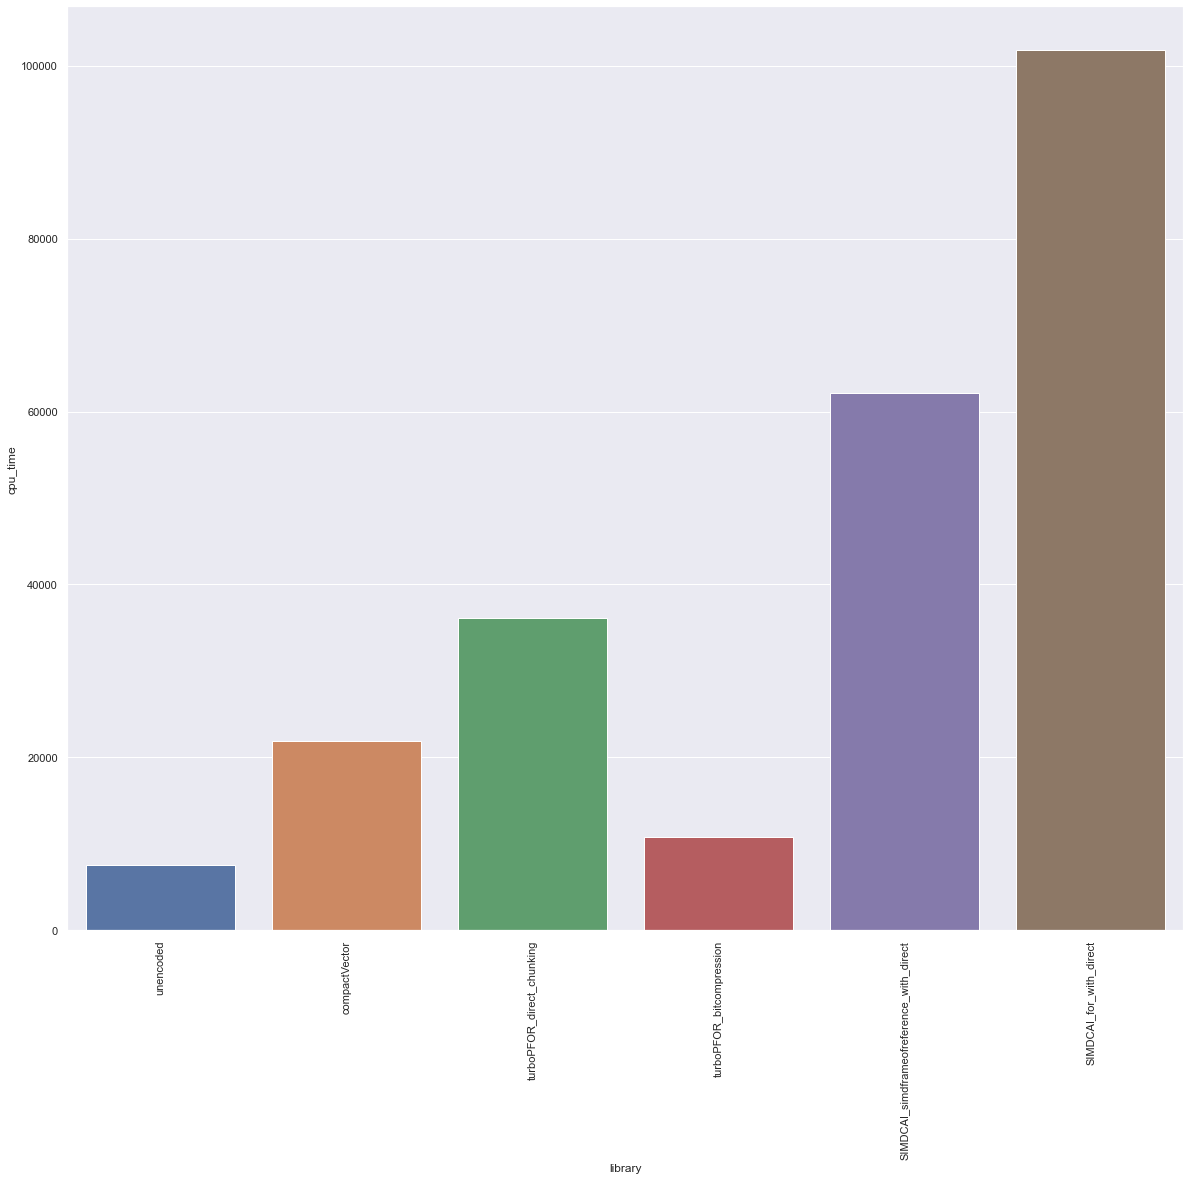

In [12]:
 for poslist_length in ["av_numbers_get_poslist_10", "av_numbers_get_poslist_10000"]:
    print(poslist_length)
    decoding_points: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"].str.contains("decoding_points_nocopy")]
    fastest_points = decoding_points.loc[decoding_points["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
    fastest_points = fastest_points.loc[fastest_points["input_data"] == poslist_length]
    plot: sns.lineplot = sns.barplot(data=fastest_points, x="library", y="cpu_time")
    plot.set_yscale("linear")
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
    plt.show()


## Sequential decoding speed of random access libs

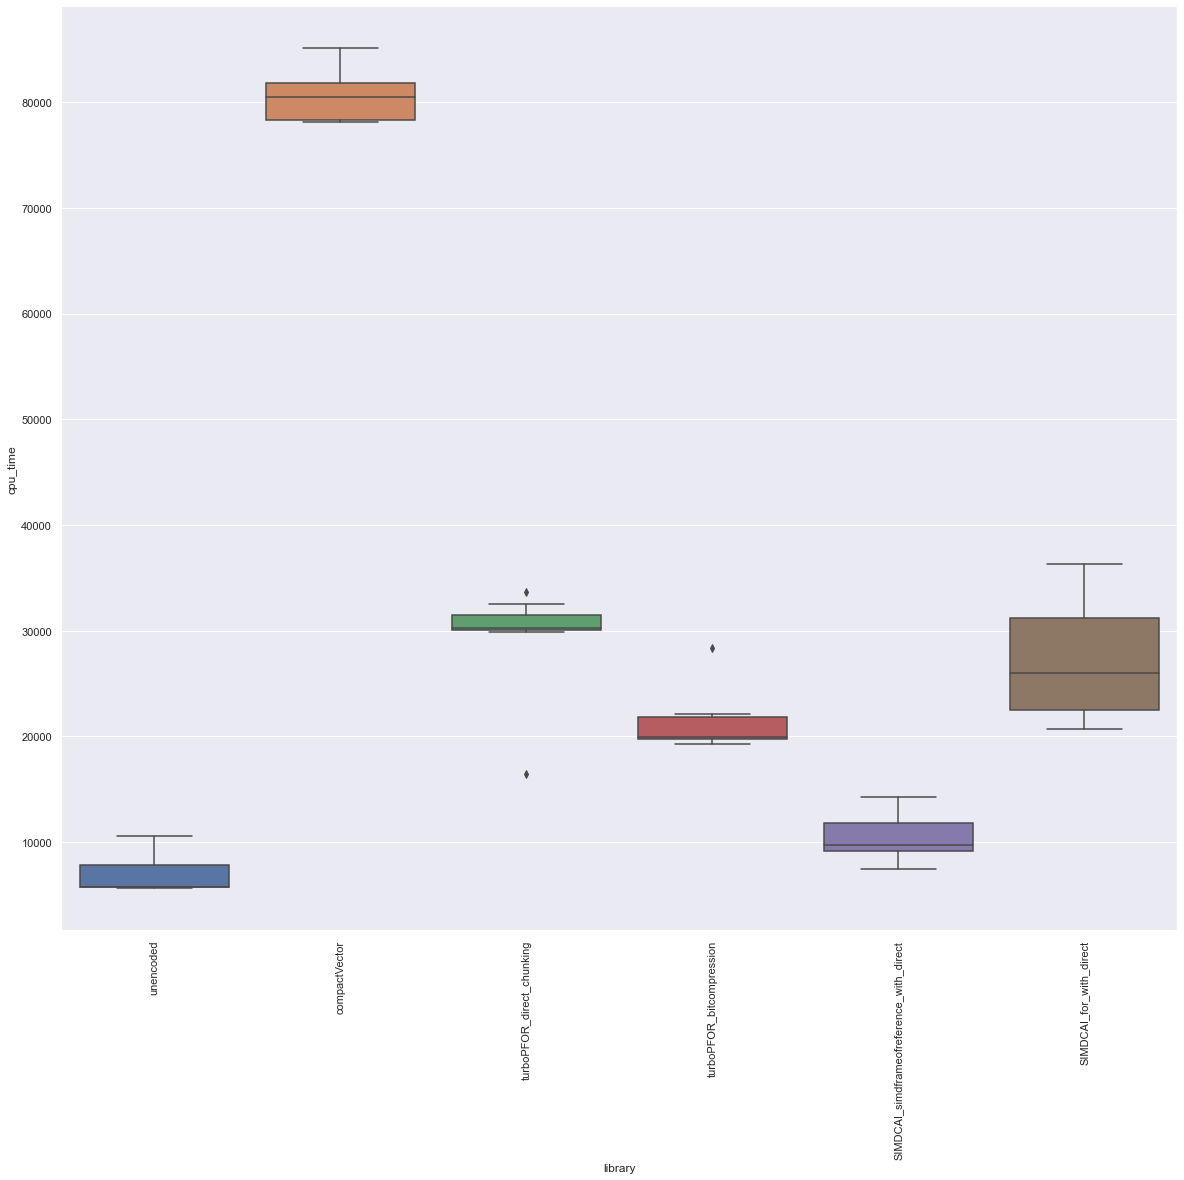

In [13]:
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds["process_type"] == "decoding"]
fastest_runtimes = decoding.loc[decoding["library"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
plot: sns.boxplot = sns.boxplot(data=fastest_runtimes, x="library", y="cpu_time")
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plot.set_yscale("linear")

## compression rates of fast random access libs (mean across all data distributions)

In [14]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats["name"] = [l.replace("SIMDCompressionAndIntersection", "SIMDCAI") for l in compression_stats["name"]]
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]

libs = [l.replace("_with_direct", "")for l in fast_random_access_libs]
fast_point_compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(libs)  + ").*")]

fast_point_compression_stats = fast_point_compression_stats[~fast_point_compression_stats["name"].str.match(".*with_select")]

def avgBitsPerInt(group):
    group["avgBitsPerInt"] = group["bitsPerInt"].mean()
    return group
fast_point_compression_stats = fast_point_compression_stats.groupby("name").apply(avgBitsPerInt)

sns.set(rc={'figure.figsize':(20,5)})

plot = sns.barplot(data=fast_point_compression_stats, x="name", y="avgBitsPerInt")
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)


plt.tight_layout()
plot.set(
    xlabel='Codec', 
    ylabel='Average Bits per Encoded Int'
)
plt.savefig("point_decoding_bits_per_int_fastest.svg", format="svg")

# todo: sort by same order
# print(libs)
# fast_point_compression_stats

FileNotFoundError: [Errno 2] No such file or directory: '../bits_per_int_2.csv'

## compression rates of fast random access libs

In [16]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(" +  "|".join(fast_random_access_libs)  + ").*")]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

FileNotFoundError: [Errno 2] No such file or directory: '../bits_per_int_2.csv'

## Compression

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

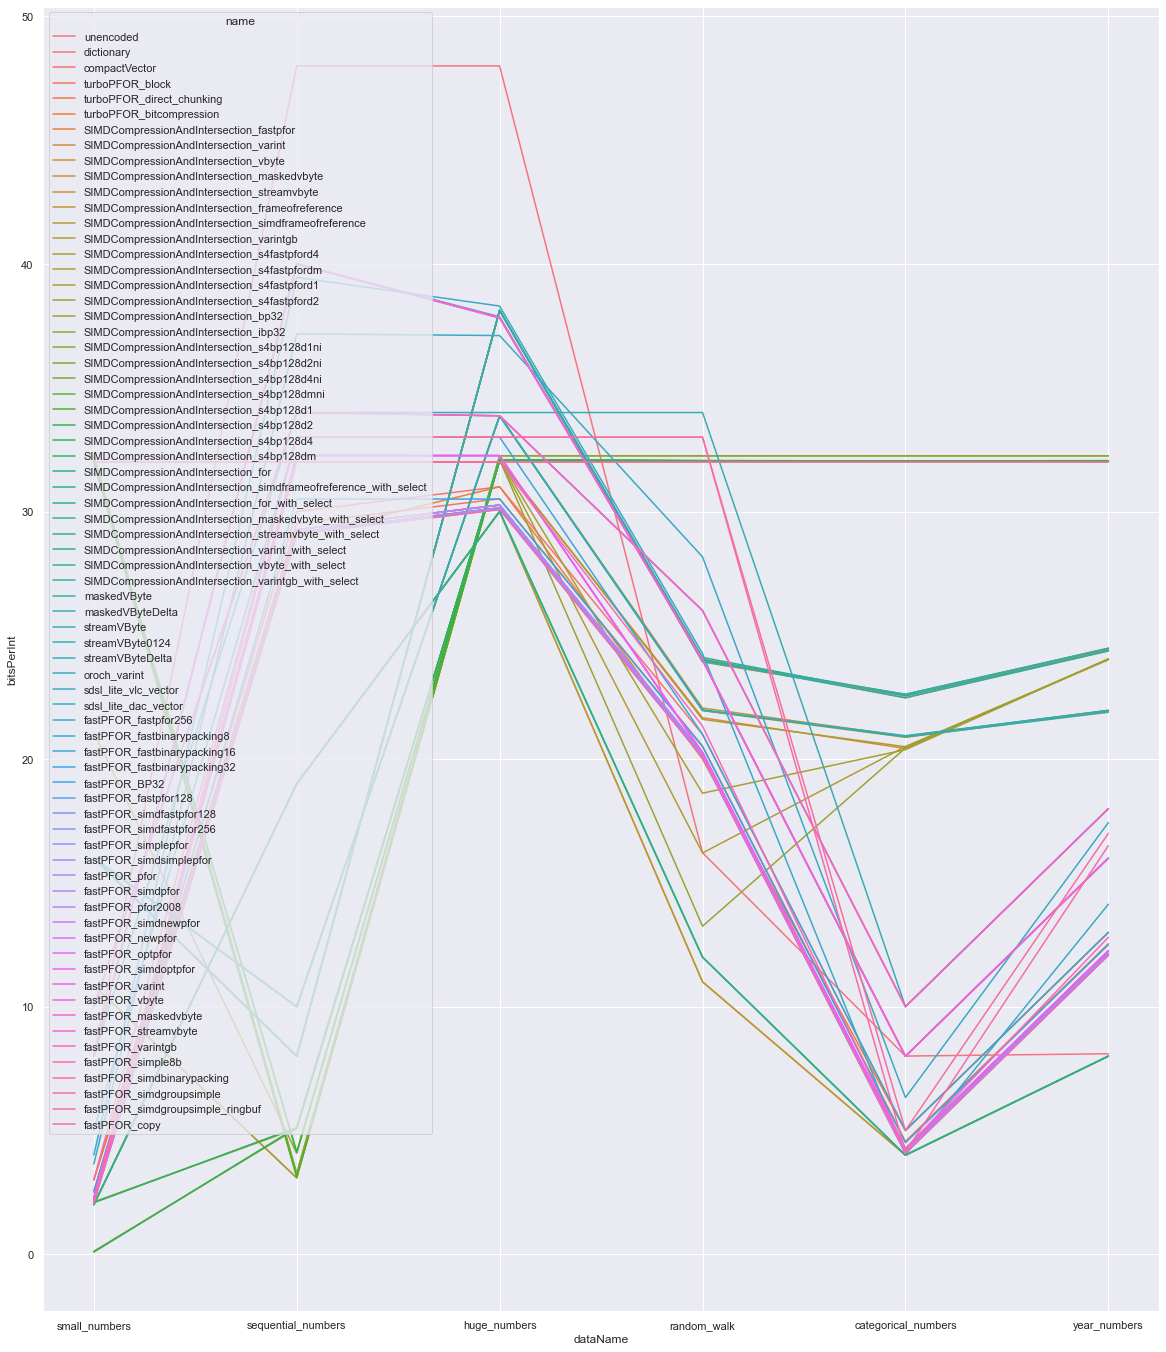

In [190]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (only smallest)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

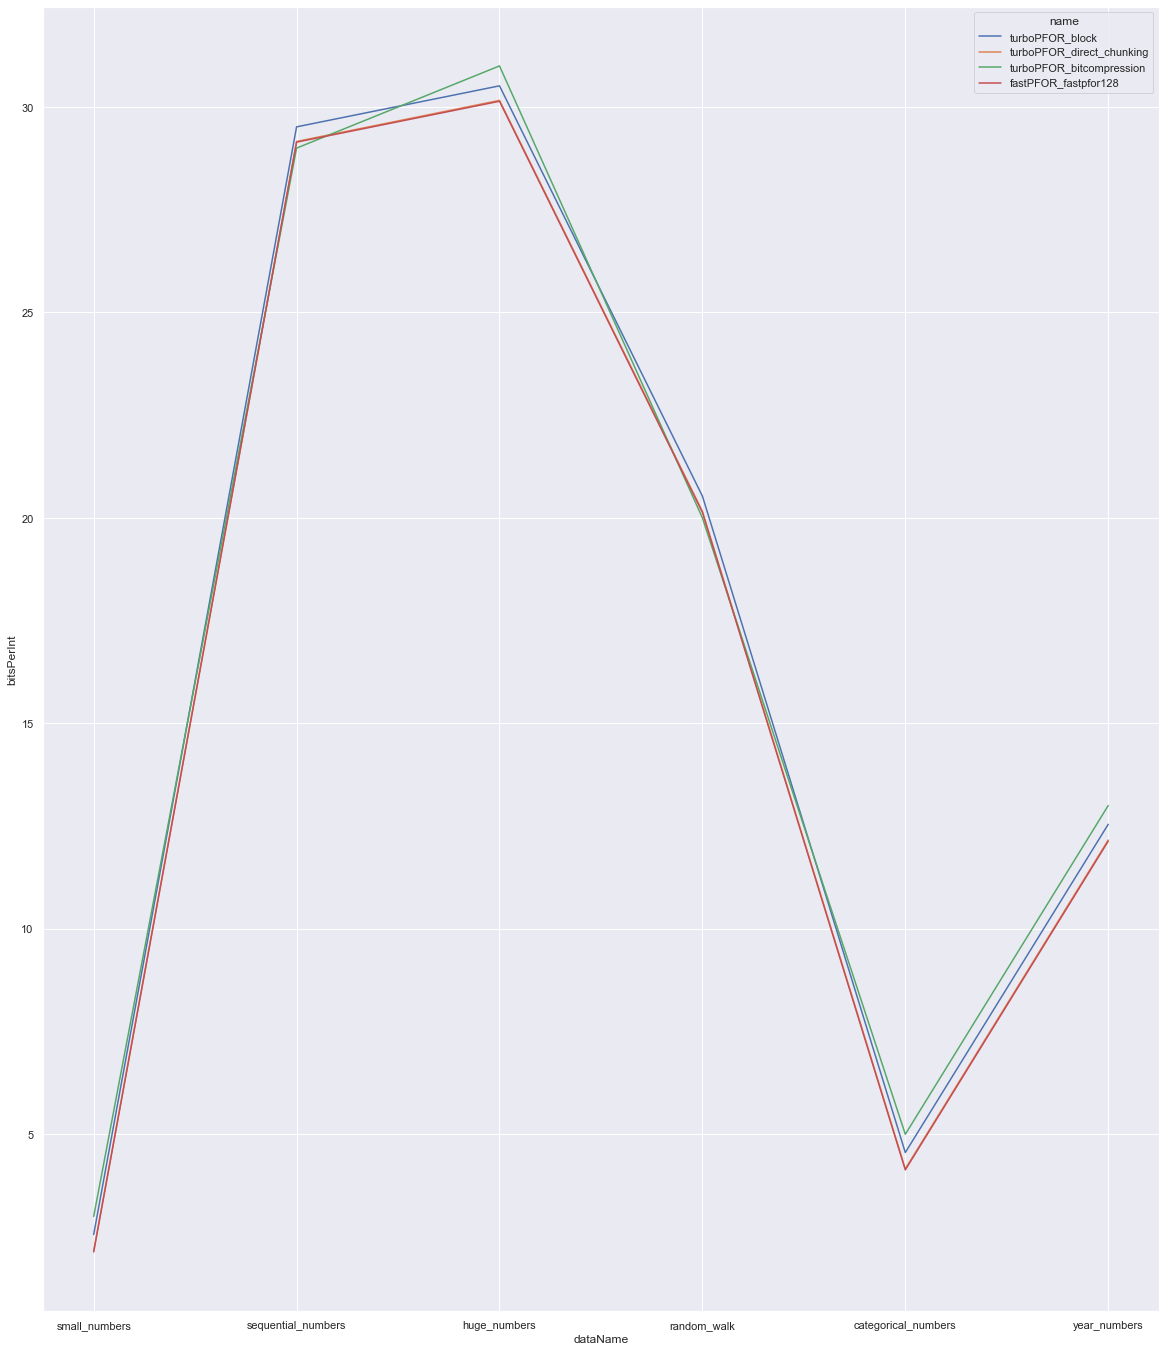

In [191]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats = compression_stats.loc[compression_stats["name"].str.match(".*(fastPFOR_fastpfor128|turboPFOR).*")]

sns.lineplot(data=compression_stats, x="dataName", y="bitsPerInt", hue="name")

## Compression (interesting libs)

<AxesSubplot:xlabel='dataName', ylabel='bitsPerInt'>

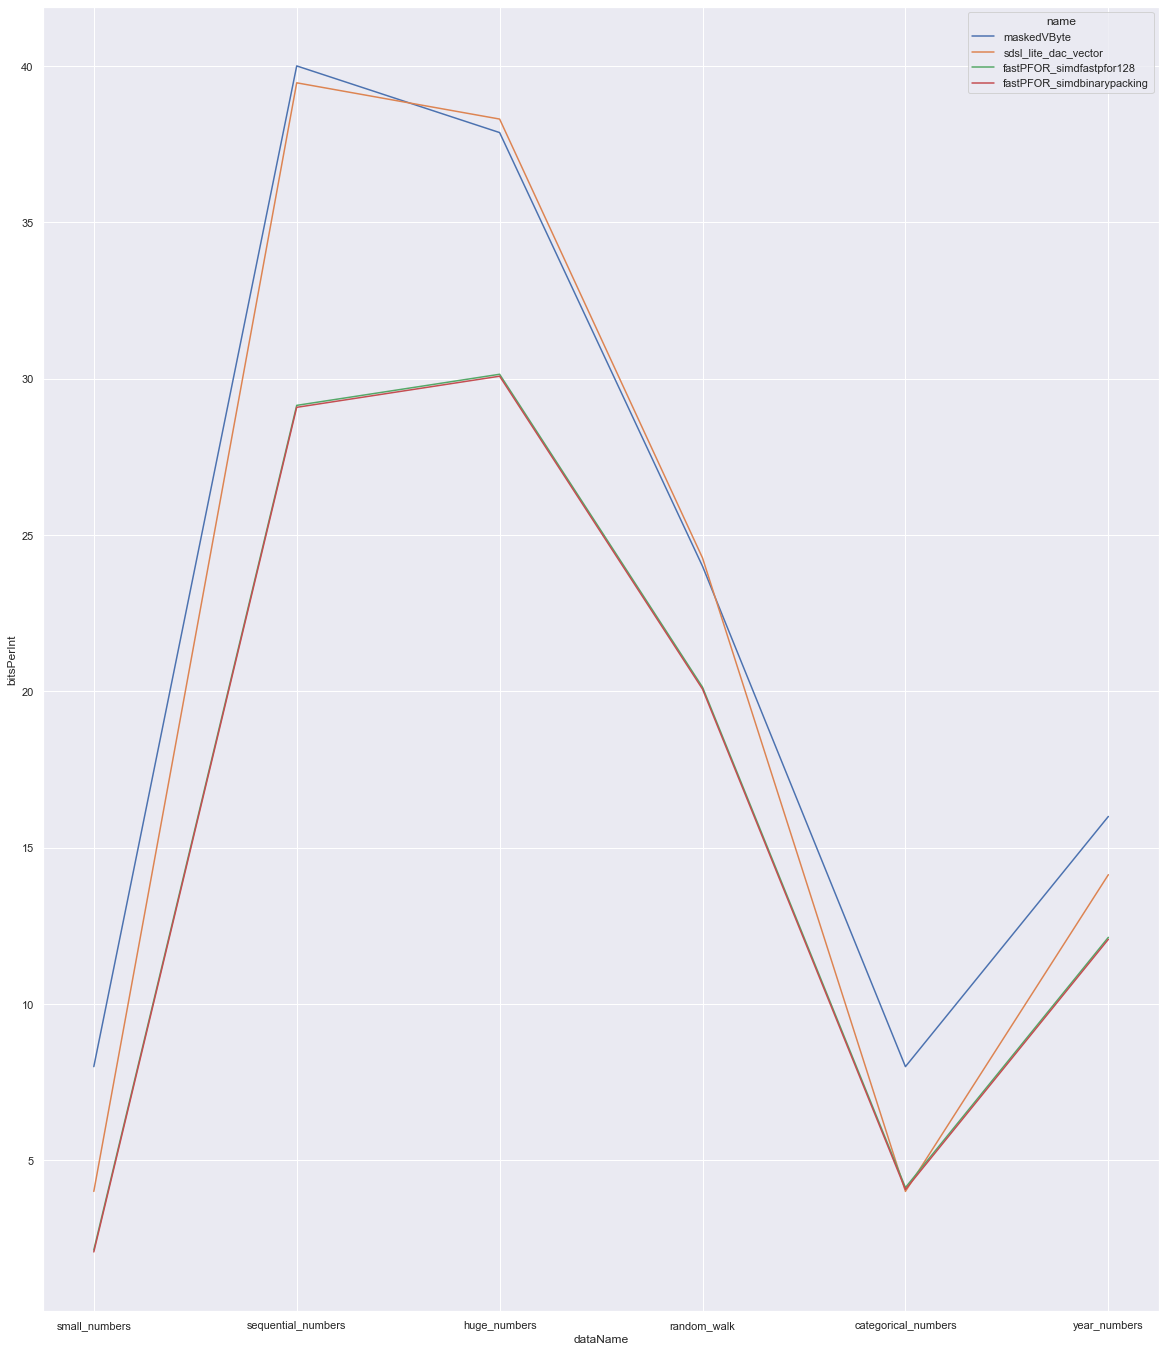

In [192]:
compression_stats: DataFrame = pd.read_csv(benchmark_compression_file)
compression_stats = compression_stats.loc[compression_stats["bitsPerInt"] != -1]
compression_stats_filtered = compression_stats.loc[compression_stats["name"].isin(dataset_filtered["library"])]
sns.lineplot(data=compression_stats_filtered, x="dataName", y="bitsPerInt", hue="name")

## Pareto

In [193]:
compression_stats["library"] = compression_stats["name"]
combined = benchmark_speeds.merge(compression_stats, left_on=["library", "input_data"], right_on=["library", "dataName"], how="inner")
combined = combined.loc[(combined["process_type"] == "encoding")] # we don't really care about encoding times (todo: proper weighting)

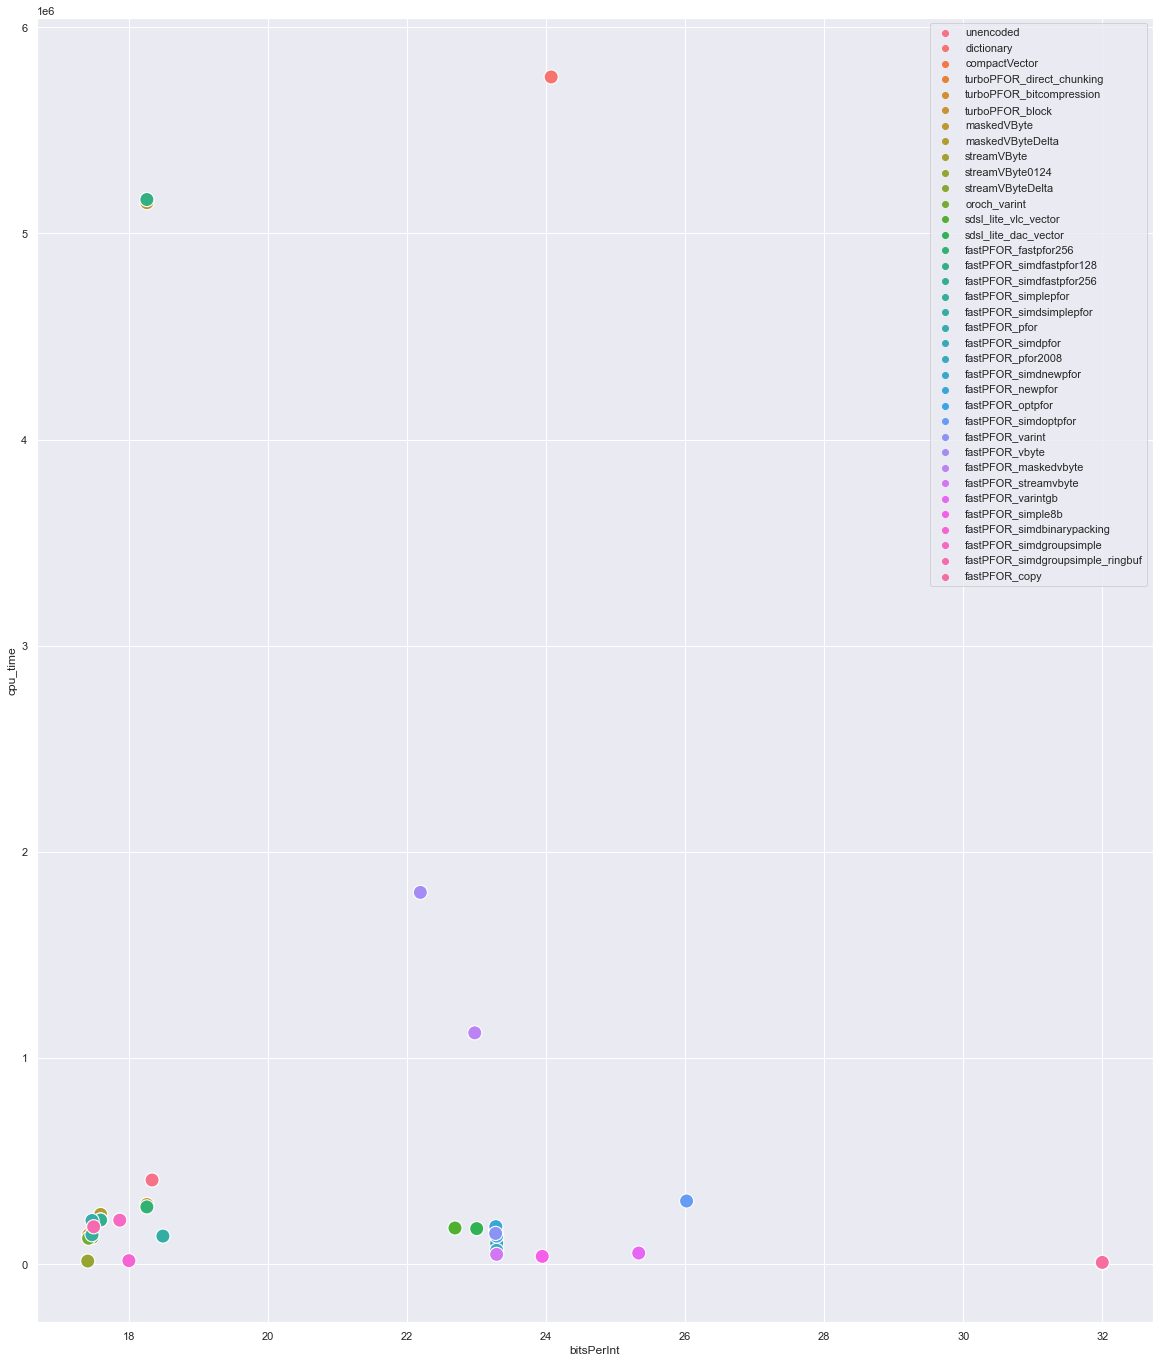

In [194]:
x = combined.groupby("library")['bitsPerInt'].mean()
y = combined.groupby("library")['cpu_time'].mean()
names = combined.library.unique()
plot = sns.scatterplot(x, y, hue=names, s=200)

## Pareto (interesting libs)

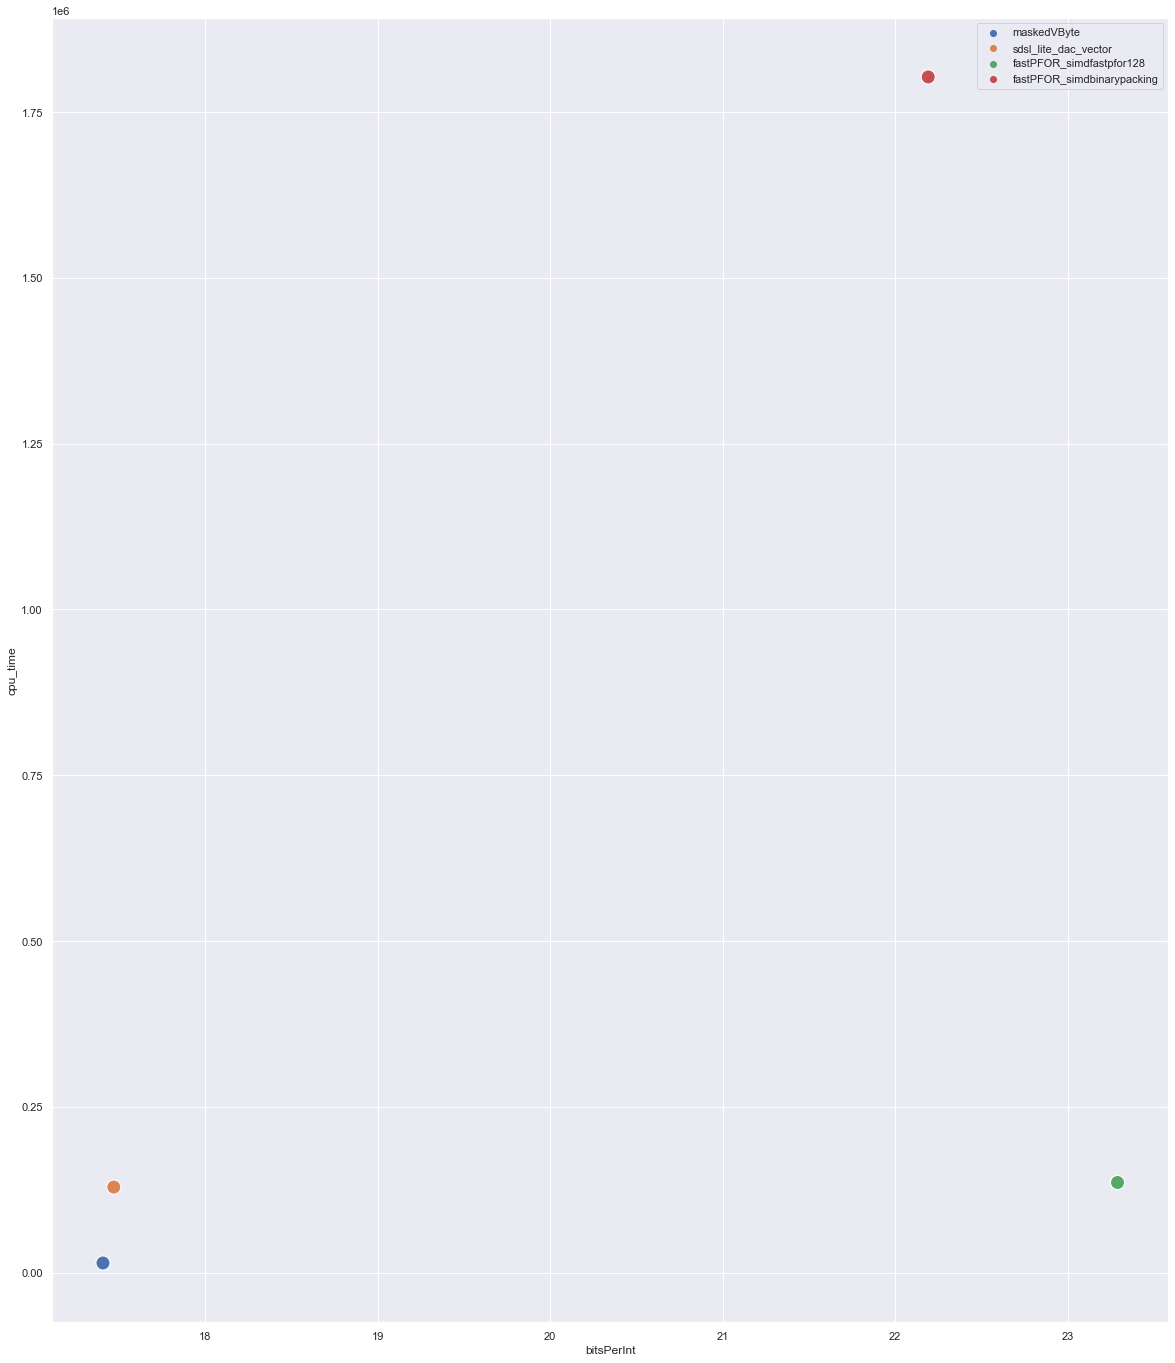

In [195]:
combined_filtered = combined.loc[(combined["library"].isin(most_interesting_libraries))]
x = combined_filtered.groupby("library")['bitsPerInt'].mean()
y = combined_filtered.groupby("library")['cpu_time'].mean()
plot = sns.scatterplot(x, y, hue=combined_filtered.library.unique(), s=200)

## Pareto (even more interesting libs :D)

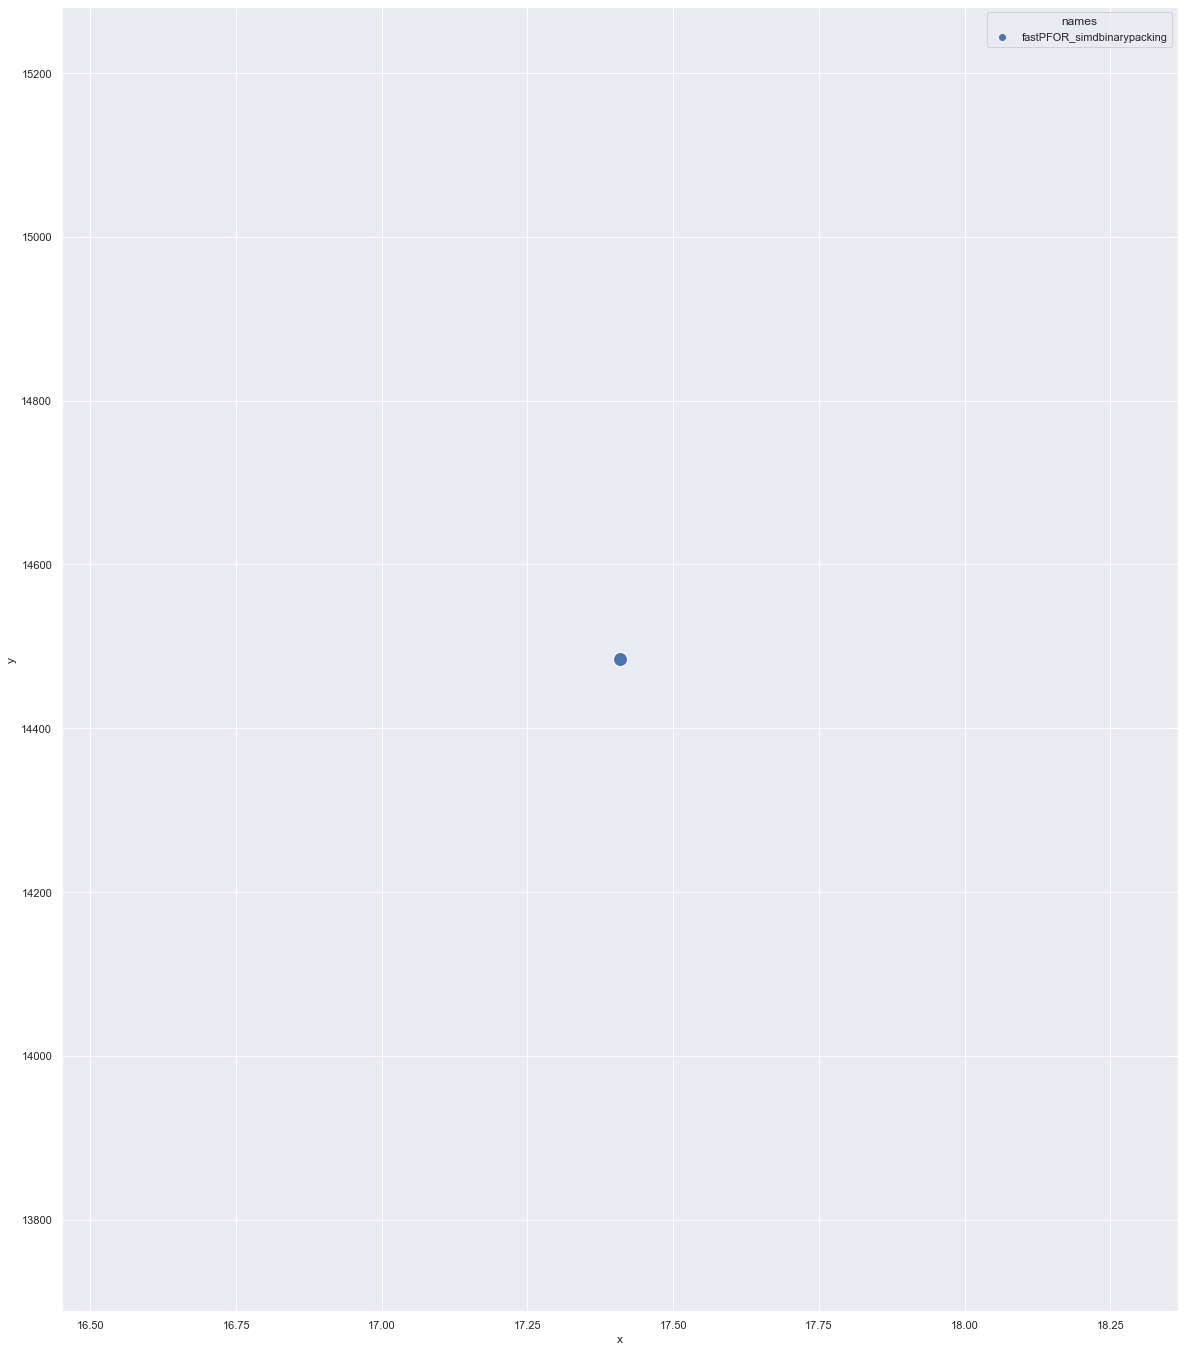

In [196]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.x < 17.7]
data = data[data.y < 50000]
#data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)


## Pareto (even more interesting libs :D)

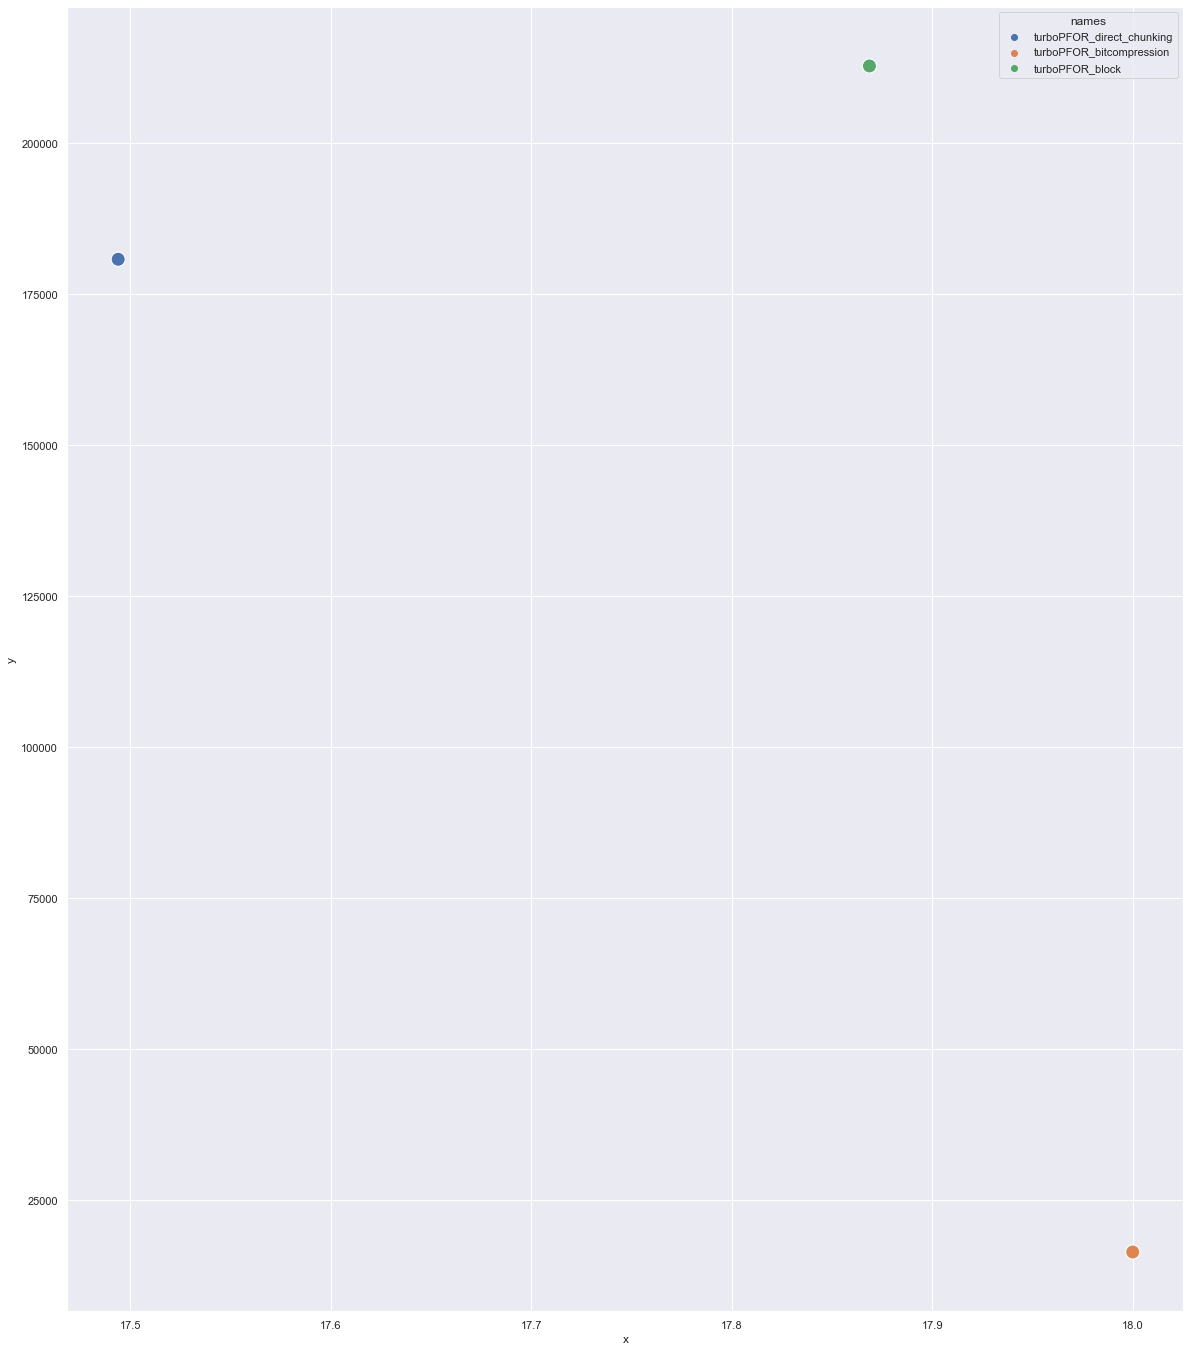

In [197]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)

## Copy vs nocopy

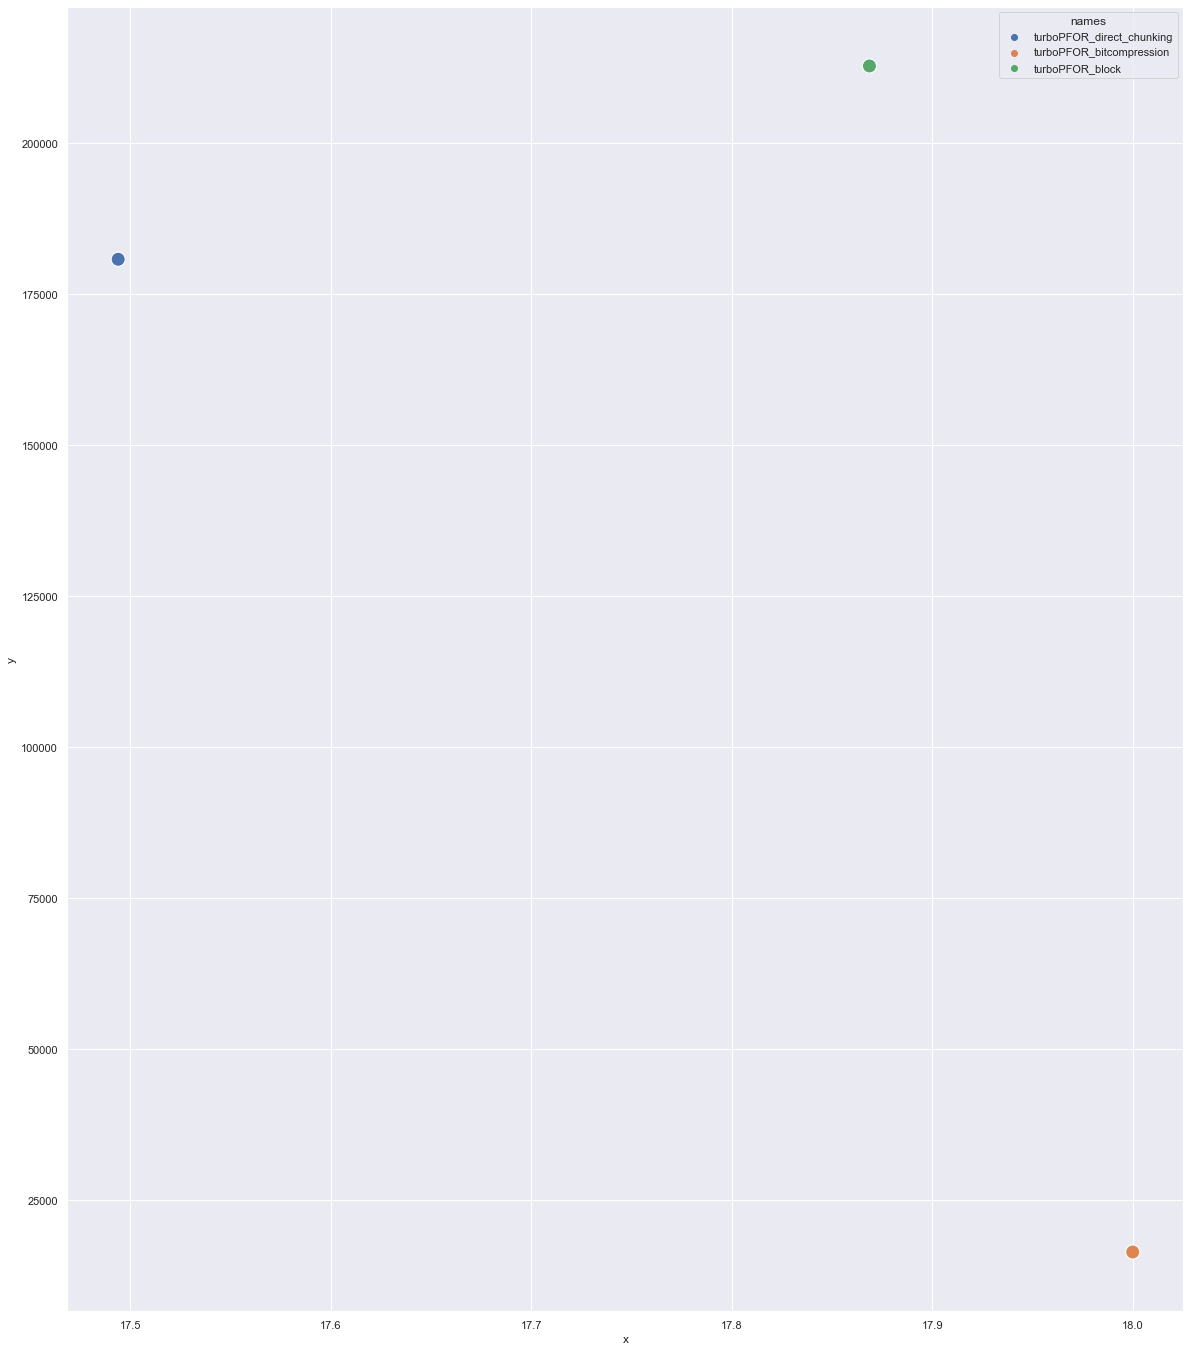

In [198]:
c = combined.groupby("library", sort=False)
x = c['bitsPerInt'].mean()
y = c['cpu_time'].mean()
names = combined.library.unique()
data = pd.DataFrame({"x": x, "y": y, "names": names})
data = data[data.names.str.contains("turbo")]
plot = sns.scatterplot(x=data.x, y=data.y, hue=data.names, s=200)
